# Object Detection

*Object detection* is a form of computer vision in which a machine learning model is trained to classify individual instances of objects in an image, and indicate a *bounding box* that marks its location. You can think of this as a progression from *image classification* (in which the model answers the question "what is this an image of?") to building solutions where we can ask the model "what objects are in this image, and where are they?".

![A robot identifying fruit](./images/object-detection.jpg)

For example, a grocery store might use an object detection model to implement an automated checkout system that scans a conveyor belt using a camera, and can identify specific items without the need to place each item on the belt and scan them individually.

The **Custom Vision** cognitive service in Microsoft Azure provides a cloud-based solution for creating and publishing custom object detection models.

## Create a Custom Vision resource

To use the Custom Vision service, you need an Azure resource that you can use to train a model, and a resource with which you can publish it for applications to use. You can use the same resource for each of these tasks, or you can use different resources for each to allocate costs separately provided both resources are created in the same region. The resource for either (or both) tasks can be a general **Cognitive Services** resource, or a specific **Custom Vision** resource. Use the following instructions to create a new **Custom Vision** resource (or you can use an existing resource if you have one).

1. In a new browser tab, open the Azure portal at [https://portal.azure.com](https://portal.azure.com), and sign in using the Microsoft account associated with your Azure subscription.
2. Select the **&#65291;Create a resource** button, search for *custom vision*, and create a **Custom Vision** resource with the following settings:
    - **Create options**: Both
    - **Subscription**: *Your Azure subscription*
    - **Resource group**: *Select or create a resource group with a unique name*
    - **Name**: *Enter a unique name*
    - **Training location**: *Choose any available region*
    - **Training pricing tier**: F0
    - **Prediction location**: *The same as the training location*
    - **Prediction pricing tier**: F0

    > **Note**: If you already have an F0 custom vision service in your subscription, select **S0** for this one.

3. Wait for the resource to be created.

## Create a Custom Vision project

To train an object detection model, you need to create a Custom Vision project based on your training resource. To do this, you'll use the Custom Vision portal.

1. In a new browser tab, open the Custom Vision portal at [https://customvision.ai](https://customvision.ai), and sign in using the Microsoft account associated with your Azure subscription.
2. Create a new project with the following settings:
    - **Name**: Grocery Detection
    - **Description**: Object detection for groceries.
    - **Resource**: *The Custom Vision resource you created previously*
    - **Project Types**: Object Detection
    - **Domains**: General
3. Wait for the project to be created and opened in the browser.

## Add and tag images

To train an object detection model, you need to upload images that contain the classes you want the model to identify, and tag them to indicate bounding boxes for each object instance.

1. Download and extract the training images from https://aka.ms/fruit-objects. The extracted folder contains a collection of images of fruit. **Note:** as a temporary workaround, if you are not able to access the training images, please go to https://www.github.com, then go to https://aka.ms/fruit-objects. 
2. In the Custom Vision portal [https://customvision.ai](https://customvision.ai), make sure you are working in your object detection project _Grocery Detection_. Then select **Add images** and upload all of the images in the extracted folder.

![Upload downloaded images by clicking add images.](./images/fruit-upload.jpg)

3. After the images have been uploaded, select the first one to open it.
4. Hold the mouse over any object in the image until an automatically detected region is displayed like the image below. Then select the object, and if necessary resize the region to surround it.

![The default region for an object](./images/object-region.jpg)

Alternatively, you can simply drag around the object to create a region.

5. When the region surrounds the object, add a new tag with the appropriate object type (*apple*, *banana*, or *orange*) as shown here:

![A tagged object in an image](./images/object-tag.jpg)

6. Select and tag each other object in the image, resizing the regions and adding new tags as required.

![Two tagged objects in an image](./images/object-tags.jpg)

7. Use the **>** link on the right to go to the next image, and tag its objects. Then just keep working through the entire image collection, tagging each apple, banana, and orange.

8. When you have finished tagging the last image, close the **Image Detail** editor and on the **Training Images** page, under **Tags**, select **Tagged** to see all of your tagged images:

![Tagged images in a project](./images/tagged-images.jpg)

## Train and test a model

Now that you've tagged the images in your project, you're ready to train a model.

1. In the Custom Vision project, click **Train** to train an object detection model using the tagged images. Select the **Quick Training** option.
2. Wait for training to complete (it might take ten minutes or so), and then review the *Precision*, *Recall*, and *mAP* performance metrics - these measure the prediction accuracy of the classification model, and should all be high.
3. At the top right of the page, click **Quick Test**, and then in the **Image URL** box, enter `https://aka.ms/apple-orange` and view the prediction that is generated. Then close the **Quick Test** window.

## Publish and consume the object detection model

Now you're ready to publish your trained model and use it from a client application.

1. At the top left of the **Performance** page, click **&#128504; Publish** to publish the trained model with the following settings:
    - **Model name**: detect-produce
    - **Prediction Resource**: *Your custom vision **prediction** resource*.

### (!) Check In 
Did you use the same model name: **detect-produce**? 

2. After publishing, click the *settings* (&#9881;) icon at the top right of the **Performance** page to view the project settings. Then, under **General** (on the left), copy the **Project Id**. Scroll down and paste it into the code cell below step 5 replacing **YOUR_PROJECT_ID**. 

> (*if you used a **Cognitive Services** resource instead of creating a **Custom Vision** resource at the beginning of this exercise, you can copy its key and endpoint from the right side of the project settings, paste it into the code cell below, and run it to see the results. Otherwise, continue completing the steps below to get the key and endpoint for your Custom Vision prediction resource*).

3. At the top left of the **Project Settings** page, click the *Projects Gallery* (&#128065;) icon to return to the Custom Vision portal home page, where your project is now listed.

4. On the Custom Vision portal home page, at the top right, click the *settings* (&#9881;) icon to view the settings for your Custom Vision service. Then, under **Resources**, expand your *prediction* resource (<u>not</u> the training resource) and copy its **Key** and **Endpoint** values to the code cell below step 5, replacing **YOUR_KEY** and **YOUR_ENDPOINT**.

### (!) Check In 
If you are using a **Custom Vision** resource, did you use the **prediction** resource (<u>not</u> the training resource)?

5. Run the code cell below by clicking the Run Cell <span>&#9655</span> button (at the top left of the cell) to set the variables to your project ID, key, and endpoint values.

In [1]:
project_id = 'b59808cf-c728-4d7f-a2ac-dbbad1000bdd' # Replace with your project ID
cv_key = '1fc1dce5a3a14fbab26d22b81e406551' # Replace with your prediction resource primary key
cv_endpoint = 'https://cv20211223-prediction.cognitiveservices.azure.com/' # Replace with your prediction resource endpoint

model_name = 'detect-produce' # this must match the model name you set when publishing your model iteration exactly (including case)!
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model detect-produce in project b59808cf-c728-4d7f-a2ac-dbbad1000bdd


In [2]:
!pip install azure-cognitiveservices-vision-customvision

Now you can use your key and endpoint with a Custom Vision client to connect to your custom vision object detection model.

Run the following code cell, which uses your model to detect individual produce items in an image.

> **Note**: Don't worry too much about the details of the code. It uses the Python SDK for the Custom Vision service to submit an image to your model and retrieve predictions for detected objects. Each prediction consists of a class name (*apple*, *banana*, or *orange*) and *bounding box* coordinates that indicate where in the image the predicted object has been detected. The code then uses this information to draw a labelled box around each object on the image.

Detecting objects in data\object-detection\produce.jpg using model detect-produce in project b59808cf-c728-4d7f-a2ac-dbbad1000bdd...


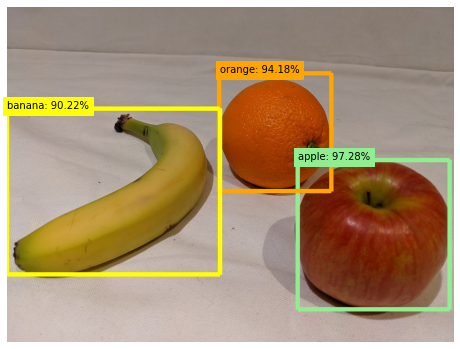

In [3]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

# Load a test image and get its dimensions
test_img_file = os.path.join('data', 'object-detection', 'produce.jpg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape

# Get a prediction client for the object detection model
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
predictor = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

# Detect objects in the test image
with open(test_img_file, mode="rb") as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

# Create a figure to display the results
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# Display the image with boxes around each detected object
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
object_colors = {
    "apple": "lightgreen",
    "banana": "yellow",
    "orange": "orange"
}
for prediction in results.predictions:
    color = 'white' # default for 'other' object tags
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)


View the resulting predictions, which show the objects detected and the probability for each prediction.